# Введение
В любом эксперименте важной частью, является представление данных в удобном виде. Для этого существует большое количество различных библиотек для визуализации. В этой статье одну из новых библиотек - [Plotly](https://plot.ly/python/) 

Plotly - библиотека с которой я работаю сейчас. С ней можно работать в двух видах: 
* Полный вид. Код начинается с команды `import plotly.graph_objects as go` 
* Компактный вид. Код начинается с команды `import plotly.express as px`

Из плюсов библиотеки отмечу отличную [документацию](https://plot.ly/python/) с большим количеством примеров, также интерактивные графики. 

Из минусов: при большом количестве графиков могут начаться подтормаживания (решается включением неинтерактивный режима)


# Установка
## Подготовка
0. (необязательно) Создадим новое окружение `conda create --name visual` 
1. Активируем его `conda activate visual`
2. Установим pandas и  numpy и Jupyter `conda install numpy pandas jupyter`
3. Создадим два массива (x и sin(x))



In [3]:
import numpy as np
import pandas as pd

x = np.linspace(0, 10, 100)
y = np.sin(x)


## Установка Plotly
Установка Plotly достаточно сложная (не в одну строчку)
Приведем тут, что говорит нам [документация](https://plot.ly/python/getting-started/)

1. `conda install plotly` (может возникать проблема No module named 'plotly', тогда пропишите pip install plotly)

2. Дальше если вы работаете
 через Jupter:

`conda install notebook ipywidgets`

через Jupterlab: 
```
conda install jupyterlab
conda install ipywidgets
```

Если через VS code ничего не надо

Проверим, что все работает:

In [4]:
import plotly.express as px
fig = px.scatter(x=x, y=y)
fig.show()

Также для сохранения графиков (как картинки, либо вывода в неинтерактивный режиме) необходимо прописать (в терминале): 
`conda install -c plotly plotly-orca psutil requests`

После этого график можно отобразить в неинтерактивном режиме либо сохранить:

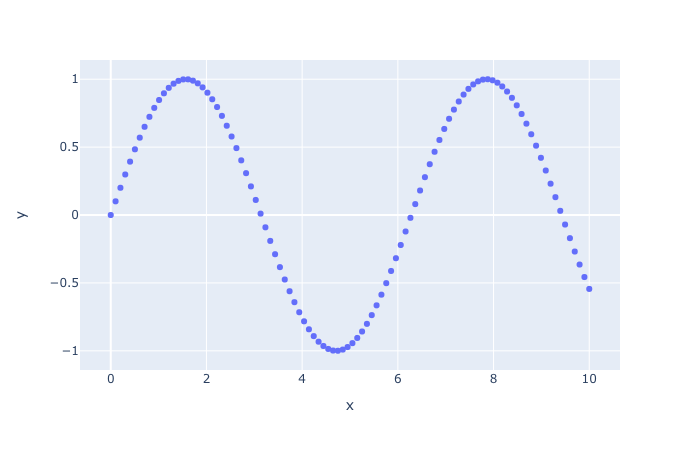

In [5]:
fig.show(renderer="png")

Как уже говорилось, plotly может работать в двух режимах, на примерах посмотрим разни

#Построение оснонвых графиков
## Scatter plot (Точечный график) 

Обычная задача возникающая на лабораторных работах:
Имеется две серии данных (c погрешностями). Необходимо нанести их на один график и построить аппроксимирующие функции. Отметим, что Plotly-express работают с DataFrame. 

Создадим DataFrame, с двумя сериями. Столбец `type` отвечает за номер серии.

In [6]:
x1 = np.linspace(-2,2 ,25) + np.random.randn()
x2 = np.linspace(-3,3 ,25) + np.random.randn()
e = np.random.sample(50)*2

y1 = x1 - 6
y2 = np.power(x2, 3) + 3
data = pd.DataFrame({'x':np.append(x1,x2),'y':np.append(y1,y2),'type':np.repeat(['1','2'], 25),'err':e})
data

,x,y,type,err
0,-1.330063,-7.330063,1,1.207495
1,-1.163396,-7.163396,1,0.637497
2,-0.996729,-6.996729,1,0.239883
3,-0.830063,-6.830063,1,0.910920
4,-0.663396,-6.663396,1,0.410565
5,-0.496729,-6.496729,1,0.658654
6,-0.330063,-6.330063,1,1.853500
7,-0.163396,-6.163396,1,0.583968
8,0.003271,-5.996729,1,1.428811
9,0.169937,-5.830063,1,1.530365


### Plotly Express


In [7]:
fig = px.scatter(data,x='x', y='y', color="type",error_y='err', title = 'example_1', trendline = 'ols')
fig.show()

Пояснение к примеру:

1. `data` - текущий data frame с которым мы рабоатем.
2. `x,y` - данные, которые мы строим. Можно,как указать названия столбцов текущего Data frame, так и указать Series или Array
3. `color` - название колонки, по которой разделеть данные на категории, в нашем это 1,2 (обратите внимание, что как строки). Аналогично работает symbol (только разные категории, отилчаются разными символами) 
4. `title` - название графика
5. `trendline` - апроксимация, значение аргумента - метод апроксимации.

[Более подробно](https://plot.ly/python-api-reference/generated/plotly.express.scatter.html#plotly.express.scatter)



### Полный вид
Построем то же, самоое через полную версию.



In [8]:
import plotly.graph_objects as go

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=data['x'][0:25], y=data['y'][0:25],
                    mode='markers',
                    name='x'))
fig.add_trace(go.Scatter(x=data['x'][25:50], y=data['y'][25:50],
                    mode='markers',
                    name='$x^2$',
                    error_x = dict(
                        type='constant',value=0.2,
                        color='purple')))
fig.show()

Пояснения:

1. go.Scatter - добавление на `fig`, точек типа Scatter. Тоесть точек от x и y.

2. Параметры: 
* x,y - данные (Series, Array like)
* mode - просто точки, просто линии, точки + линии
* 
 
Как видно из данного примера в полоном режиме доступно больше возможностей для настройки,но и код получается более длинным. 

In [9]:
fig = go.Figure()

# Add traces

fig.add_trace(go.Scatter(x=data['x'], y=data['y'],
                    mode='markers',
                    marker = dict(
                        symbol = 'cross'
                    ),
                    name='$x^2$'))
fig.show()

В этом примере, мы задали `symbol` посмотреть все варианты можно [тут](https://plot.ly/python/reference/#scatter-marker-symbol).

## 3D scatter plot

На первом курсе возниквает задача построить эллипсоид инерции. Давайте построим это с помощью plotly.
Создадим набор точек:


In [55]:
omega =  np.linspace(0 , 2*np.pi ,50)
phi = np.linspace(-np.pi/2 , np.pi/2 ,50)
a,b,c = 1,2,3
x = []
y = []
z = []
for i in omega:
    for j in phi:
        x.append(a * np.sin(i)*np.cos(j))
        y.append(b * np.sin(i)*np.sin(j))
        z.append(c * np.cos(i))


In [56]:
fig = px.scatter_3d(x=x, y=y, z=z)
fig.show()